<a href="https://colab.research.google.com/github/khshohelrana/Python/blob/main/ML_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import re
import pandas as pd
from sklearn.decomposition import PCA
pd.set_option("display.max_colwidth", 200)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import gensim
from gensim.models import Word2Vec
import seaborn as sns
import string
import nltk # for text manipulation
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.layers import Dense, Dropout
import scipy.sparse as sp



%matplotlib inline

In [ ]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [ ]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [ ]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [ ]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [ ]:
train["label"].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

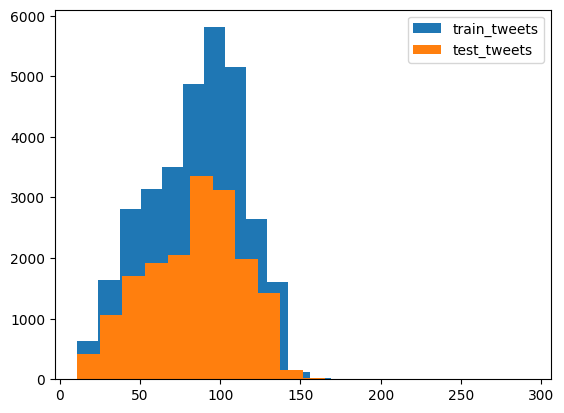

In [ ]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [ ]:
combi = pd.concat([train, test], ignore_index=True) #
combi.shape

(49159, 3)

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [ ]:
tokenized_tweet.head()

0                                   [when, father, dysfunctional, selfish, drags, kids, into, dysfunction., #run]
1    [thanks, #lyft, credit, can't, cause, they, don't, offer, wheelchair, vans, pdx., #disapointed, #getthanked]
2                                                                                         [bihday, your, majesty]
3                                      [#model, love, take, with, time, urð±!!!, ðððð, ð¦ð¦ð¦]
4                                                                             [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

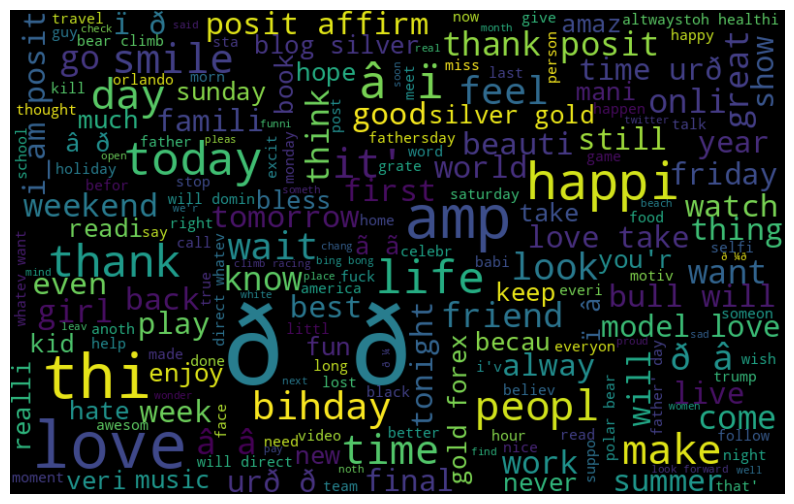

In [ ]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

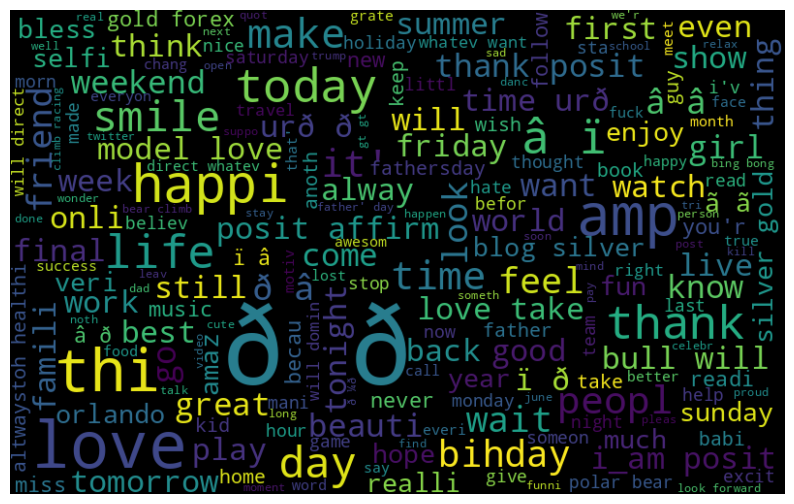

In [ ]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

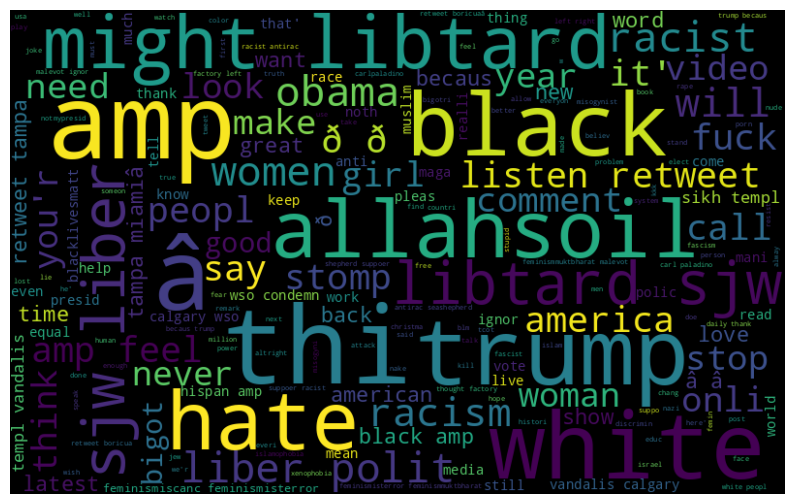

In [ ]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:

def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:


HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])


HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])


HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

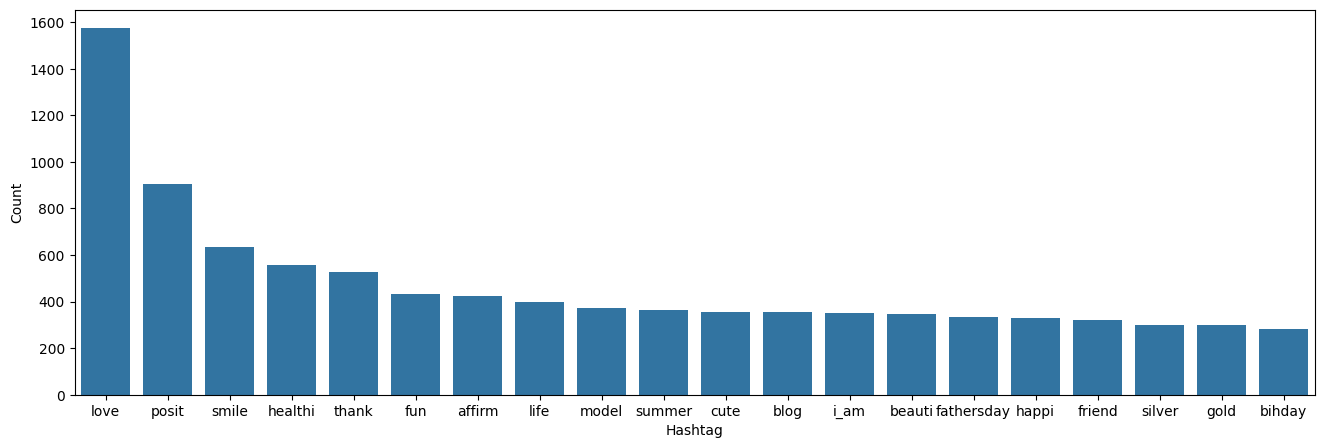

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})


d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

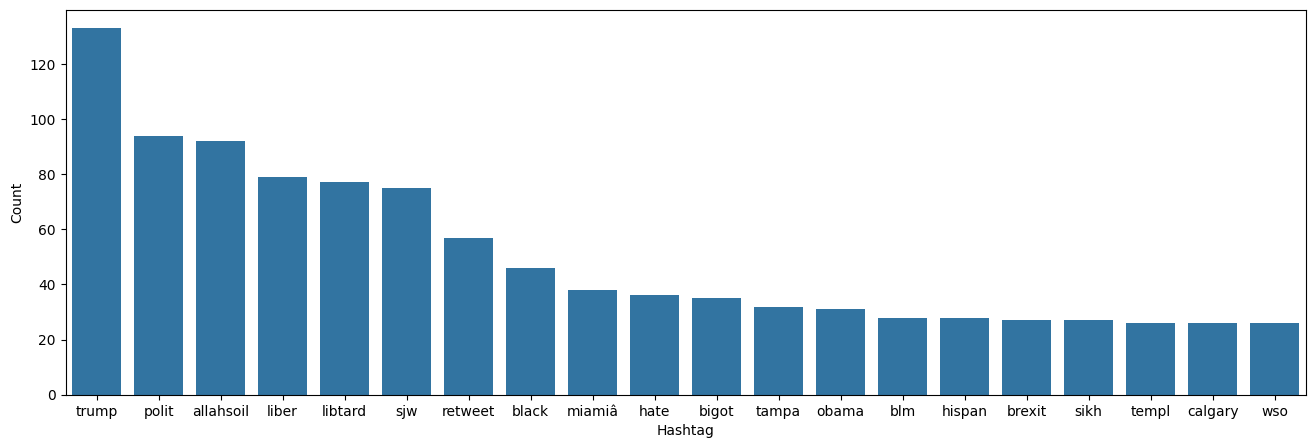

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})


e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=200, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 200)

In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())


model_w2v = Word2Vec(
    tokenized_tweet,
    vector_size=200,
    window=5,
    min_count=2,
    sg=1,
    hs=0,
    negative=10,
    workers=2,
    seed=34
)


model_w2v.train(tokenized_tweet, total_examples=len(combi['tidy_tweet']), epochs=20)

(6705130, 8184140)

In [ ]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.6470972299575806),
 ('shopping!', 0.6223089694976807),
 ('#biall2016', 0.5958104133605957),
 ('lukey', 0.5894272327423096),
 ('#brunch', 0.5834974646568298),
 ('sister!!', 0.5822937488555908),
 ('buffet', 0.5745185613632202),
 ('#toast', 0.5743274688720703),
 ('#dominicanrepubl', 0.5669319033622742),
 ('enrout', 0.5599284768104553)]

In [ ]:

model_w2v.wv.most_similar(positive="trump")

[('fraud.', 0.5651138424873352),
 ('suppoer.', 0.5600793957710266),
 ('phony.', 0.557136595249176),
 ('sexist.', 0.5519271492958069),
 ('businessman:', 0.5446011424064636),
 ('donald', 0.54304438829422),
 ('presidential.', 0.541153609752655),
 ('churchil', 0.537395179271698),
 ('politician:', 0.5277355909347534),
 ('rally.', 0.5230305194854736)]

In [ ]:
model_w2v.wv['food']

array([-4.9251530e-01, -4.5035058e-01, -2.5337157e-03,  2.5101852e-01,
       -4.6593067e-01, -1.5812942e-01,  5.3606544e-02, -9.2987335e-01,
        2.5838748e-01,  4.4832668e-01, -1.4406900e-01,  4.2312875e-01,
        9.8272912e-02, -5.8274263e-01,  1.5724702e-01,  7.4885231e-01,
        4.5329177e-01,  7.5323731e-01, -3.4711978e-01, -1.8881494e-01,
       -6.1648566e-01,  6.1697793e-01,  8.8348374e-04, -7.4564248e-01,
        2.6408814e-02,  7.6893312e-01,  1.9288187e-01, -3.6915690e-01,
       -1.9310921e-01, -4.4587645e-01, -2.6046482e-01, -2.2144882e-02,
       -1.7093845e-01, -1.2009205e-01,  1.8788689e-01,  6.5234322e-03,
        3.0722106e-01,  7.3430490e-01,  3.8555145e-01,  1.5494594e-01,
       -7.7353656e-01, -2.4773830e-01,  4.4791991e-01, -6.3720256e-01,
       -1.4772077e-01, -7.6803125e-02,  6.8393463e-01,  1.3872722e-01,
       -4.7496664e-03, -7.6585375e-02,  2.8938645e-01,  2.6767945e-01,
        6.8428859e-02, -3.0487582e-01,  7.9671822e-02,  7.1270949e-01,
      

In [ ]:
len(model_w2v.wv['food'])

200

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:

            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

In [ ]:
labeled_tweets = add_label(tokenized_tweet)

In [ ]:
labeled_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', "can't", 'caus', 'they', "don't", 'offer', 'wheelchair', 'van', 'pdx.', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fare', 'talk', 'befor', 'they', 'leave.', 'chao', 'disput', 'when', 'they', 'there.', '#allshowandnogo'], tags=['tweet_5'])]

In [ ]:
model_d2v = gensim.models.Doc2Vec(dm=1,
                                  dm_mean=1,
                                  vector_size=200,
                                  window=5,
                                  negative=7,
                                  min_count=5,
                                  workers=3,
                                  alpha=0.1,
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|██████████| 49159/49159 [00:00<00:00, 2599901.52it/s]


In [ ]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))

docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

**Logistic Regresson**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]


xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],
                                                          random_state=42,
                                                          test_size=0.3)

In [ ]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)

prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(yvalid, prediction_int)

0.3615160349854228

In [ ]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False)

In [ ]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [ ]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(yvalid, prediction_int)

0.5416666666666666

In [ ]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [ ]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)

0.5909428359317

In [ ]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [ ]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)

0.32413793103448274

**Naive Bayes**

Naive Bayes F1 Score (Bag-of-Words): 0.36596385542168675


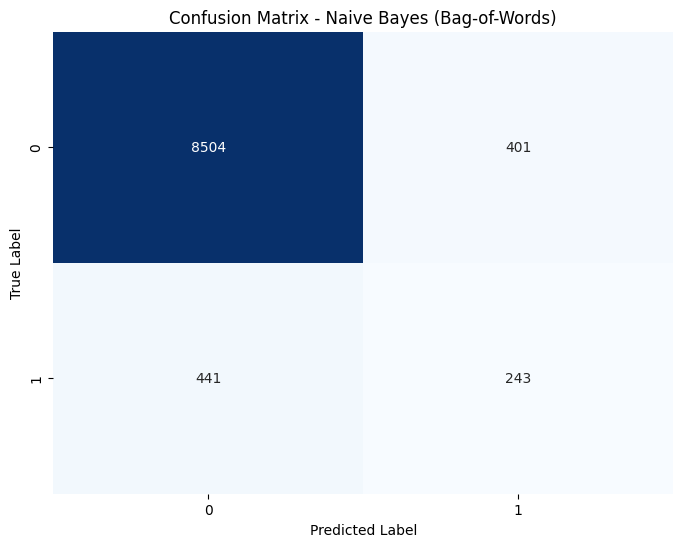

Classification Report - Naive Bayes (Bag-of-Words):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8905
           1       0.38      0.36      0.37       684

    accuracy                           0.91      9589
   macro avg       0.66      0.66      0.66      9589
weighted avg       0.91      0.91      0.91      9589



In [268]:
nb = MultinomialNB()
nb.fit(xtrain_bow, ytrain)


prediction = nb.predict_proba(xvalid_bow)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_nb_bow = f1_score(yvalid, prediction_int)

print("Naive Bayes F1 Score (Bag-of-Words):", f1_nb_bow)


cm_nb = confusion_matrix(yvalid, prediction_int)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes (Bag-of-Words)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print("Classification Report - Naive Bayes (Bag-of-Words):")
print(classification_report(yvalid, prediction_int))


test_pred = nb.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(int)

e
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('sub_nb_bow.csv', index=False)

**CNN**

Epoch 1/3
350/350 [==============================] - 7s 18ms/step - loss: 0.2827 - accuracy: 0.9304 - val_loss: 0.2556 - val_accuracy: 0.9287
Epoch 2/3
350/350 [==============================] - 7s 19ms/step - loss: 0.2507 - accuracy: 0.9304 - val_loss: 0.2528 - val_accuracy: 0.9287
Epoch 3/3
350/350 [==============================] - 5s 13ms/step - loss: 0.2492 - accuracy: 0.9304 - val_loss: 0.2529 - val_accuracy: 0.9287


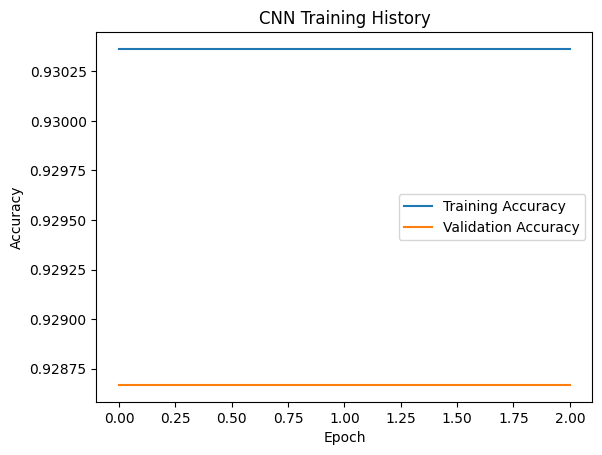

538/538 [==============================] - 1s 3ms/step


In [271]:
xtrain_cnn = xtrain_bow.toarray().reshape((xtrain_bow.shape[0], xtrain_bow.shape[1], 1))
xvalid_cnn = xvalid_bow.toarray().reshape((xvalid_bow.shape[0], xvalid_bow.shape[1], 1))


model_cnn = Sequential()
model_cnn.add(Conv1D(128, 5, activation='relu', input_shape=(xtrain_bow.shape[1], 1)))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model_cnn.fit(xtrain_cnn, ytrain, epochs=3, batch_size=64, validation_data=(xvalid_cnn, yvalid))


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


test_pred_cnn = model_cnn.predict(test_bow.toarray().reshape((test_bow.shape[0], test_bow.shape[1], 1)))
test_pred_int_cnn = (test_pred_cnn >= 0.3).astype(int)


test['label'] = test_pred_int_cnn
submission = test[['id', 'label']]
submission.to_csv('sub_cnn_bow.csv', index=False)

**Multilayer perceptron**

Epoch 1/3
350/350 [==============================] - 9s 21ms/step - loss: 0.2143 - accuracy: 0.9321 - val_loss: 0.1880 - val_accuracy: 0.9358
Epoch 2/3
350/350 [==============================] - 4s 12ms/step - loss: 0.1818 - accuracy: 0.9389 - val_loss: 0.1860 - val_accuracy: 0.9357
Epoch 3/3
350/350 [==============================] - 3s 8ms/step - loss: 0.1752 - accuracy: 0.9405 - val_loss: 0.1881 - val_accuracy: 0.9364


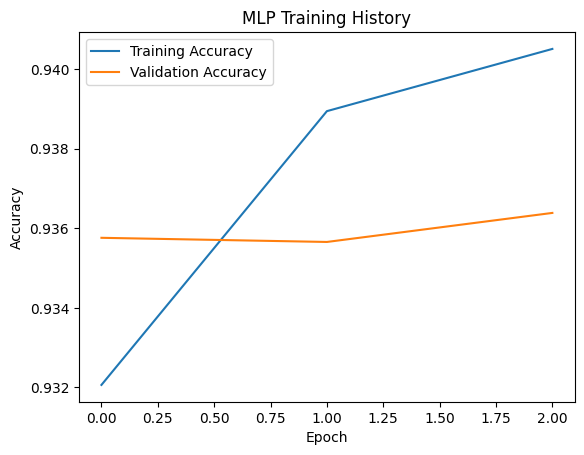

538/538 [==============================] - 1s 2ms/step


In [274]:
model_mlp = Sequential()
model_mlp.add(Dense(512, activation='relu', input_shape=(xtrain_bow.shape[1],)))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(256, activation='relu'))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(1, activation='sigmoid'))
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

xtrain_bow_dense = xtrain_bow.toarray()
xvalid_bow_dense = xvalid_bow.toarray()


history = model_mlp.fit(xtrain_bow_dense, ytrain, epochs=3, batch_size=64, validation_data=(xvalid_bow_dense, yvalid))


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


test_pred_mlp = model_mlp.predict(test_bow.toarray())
test_pred_int_mlp = (test_pred_mlp >= 0.3).astype(int)

test['label'] = test_pred_int_mlp
submission = test[['id', 'label']]
submission.to_csv('sub_mlp_bow.csv', index=False)